# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Entrainement Sklearn

---

# Observations et environnement
---

In [1]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [2]:
import importlib
import pandas as pd
import seaborn as sns

## Paramètres globaux

In [3]:
random_state = 42

## Données d'entrainement

In [4]:
df_texts_recueil = pd.read_csv('data/tmp/221118-TextsInfox.csv')

In [5]:
df_texts_recueil

,url,text,infox
0,https://ripostelaique.com/oui-la-russie-doit-e...,"Oui, la Russie va faire tomber cette Europe po...",0.0
1,https://ripostelaique.com/georgia-meloni-rafle...,Georgia Meloni rafle la mise : un grand bravo ...,0.0
2,https://ripostelaique.com/grande-bretagne-davo...,Grande-Bretagne: Davos prend ouvertement le po...,1.0
3,https://www.medias-presse.info/pelerinage-de-l...,Pèlerinage de la FSSPX à Lourdes : certains gr...,0.0
4,https://www.medias-presse.info/contrat-secret-...,Contrat secret entre Pfizer et von der Leyen :...,1.0
...,...,...,...
485,https://www.lelibrepenseur.org/sanna-marine-la...,"Sanna Marin, la Première ministre finlandaise,...",0.0
486,https://www.lelibrepenseur.org/manifestations-...,Manifestations importantes d’agriculteurs aux ...,1.0
487,https://www.lelibrepenseur.org/les-deces-exces...,Les décès excessifs sont en augmentation mais ...,1.0
488,https://www.lelibrepenseur.org/1-milliard-de-c...,1 milliard de Chinois touchés par un piratage ...,1.0


In [6]:
df_texts_afp =  pd.read_csv('data/tmp/221118-TextsAfp.csv')

In [7]:
df_texts_afp

,url,text,infox
0,https://www.francesoir.fr/politique-monde/pres...,Présidentielle au Brésil: Bolsonaro talonne Lu...,0.0
1,https://www.francesoir.fr/politique-france/la-...,La France lance un plan de sobriété énergétiqu...,0.0
2,https://www.francesoir.fr/politique-monde/mani...,Manifestations des femmes en Iran contre le po...,0.0
3,https://www.francesoir.fr/politique-france/aff...,Affaire Quatennens: LFI sous la pression de la...,0.0
4,https://www.francesoir.fr/politique-monde/covi...,"Covid-19: pour Joe Biden, ""la pandémie est ter...",0.0
...,...,...,...
3232,https://www.francesoir.fr/lifestyle-gastronomi...,La deuxième vie des coquilles d'huîtres\nLes h...,0.0
3233,https://www.francesoir.fr/lifestyle-gastronomi...,La truffe se fait rare\nVictime du réchauffeme...,0.0
3234,https://www.francesoir.fr/lifestyle-gastronomi...,Rungis prépare un Noël opulent malgré les atte...,0.0
3235,https://www.francesoir.fr/lifestyle-gastronomi...,Gastronomie: le Franco-Suisse Benoît Violier m...,0.0


In [8]:
with open('data/tmp/221110-IgnoreLemmas.txt','r') as file:
    ignore_words = file.read().split()

In [9]:
print(ignore_words[:100])
print(len(ignore_words))

['de', 'la', 'le', 'les', 'et', 'des', 'en', 'un', 'du', 'est', 'une', 'que', 'être', 'avoir', 'pour', 'dans', 'qui', 'il', 'par', 'sur', 'au', 'pas', 'ce', 'plaire', 'faire', 'ne', 'qu', 'pouvoir', 'se', 'avec', 'tout', 'ou', 'été', 'son', 'mais', 'aux', 'cette', 'on', 'nous', 'comme', 'elle', 'même', 'autre', 'devoir', 'ces', 'pays', 'leur', 'si', 'sa', 'ses', 'bien', 'état', 'contre', 'ils', 'vous', 'sans', 'voir', 'je', 'après', 'deux', 'depuis', 'mettre', 'russie', 'monde', 'entre', 'grand', 'an', 'dire', 'covid', 'invitant', 'guéguen', 'patiemment', 'méditation', 'eda', 'perdurer', 'inversement', 'guedj', 'penn', 'kang', 'officieux', 'jurisprudence', 'kant', 'hectare', 'islamisation', 'hebdo', 'guichard', 'entente', 'guihard', 'pepe', 'duel', 'haïr', 'naufrage', 'ironiquement', 'olivennes', 'juvénile', 'inégal', 'patois', 'justifiant', 'echos', 'jacky']
15203


# Experience
---

## Pipeline

### Preprocessor

In [10]:
import patat.util.text

importlib.reload(patat.util.text)
preprocessor = patat.util.text.get_latin
#preprocessor=None

### Tokenizer

In [11]:
from patat.ml.lex_analyser import LexAnalyser

lex = LexAnalyser()

tokenizer = lex.get_lemmas_from_text

### TfIdfVectorizer

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
afp_size = 20
#afp_size = 120
df_ml = pd.concat([df_texts_recueil,df_texts_afp.sample(afp_size,random_state=random_state)])

In [17]:
%%time
vectorizer = TfidfVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_words)
#vectorizer = CountVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_words)
count_matrix = vectorizer.fit_transform(df_ml['text'])
count_array = count_matrix.toarray()
df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
df_tf.shape

df_X = df_tf

len(df_X.keys())

/Users/fm/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aboutir', 'abrutir', 'ambitieux', 'bouillir', 'coordonner', 'croire', 'décombrer', 'démoraliser', 'déplaire', 'désordonner', 'florir', 'joindre', 'matcher', 'maudire', 'menacer', 'mol', 'oxygéner', 'personnaliser', 'presser', 'précieux', 'présumer', 'recroître', 'saisir', 'satisfaire', 'subventionner', 'teindre', 'tracter', 'émerger', 'énoncer', 'équivaloir'] not in stop_words.
  warnings.warn(


CPU times: user 354 ms, sys: 9.51 ms, total: 363 ms
Wall time: 367 ms


9594

## Entrainement sklearn

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [19]:
X = df_X
y=df_ml['infox']

In [21]:
df_X.shape

(510, 9594)

### Initialisations

In [22]:
train_size=0.8
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=random_state,train_size=train_size)

In [23]:
def print_metrics(y_train, y_test, y_pred):
    print(f'Train size \t{len(y_train)} = {int(len(y_train)-y_train.sum())} False + {int(y_train.sum())} True' )
    print(f'Test size \t{len(y_test)} = {int(len(y_test)-y_test.sum())} False + {int(y_test.sum())} True\n' )
    print(f'Accuracy score \t{metrics.accuracy_score(y_test, y_pred)*100:.2f}%')
    print(f'Recall score \t{metrics.recall_score(y_test, y_pred)*100:.2f}%')
    print(f'F1 score \t{metrics.f1_score(y_test, y_pred)*100:.2f}%')
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred,normalize='all')
    print(f'False Positive \t{cnf_matrix[0,1]*100:.2f}%')
    print(f'False Negative \t{cnf_matrix[1,0]*100:.2f}%\n')    

### Dummy Classifier

In [24]:
from sklearn.dummy import DummyClassifier
#strategies = ['most_frequent', 'prior', 'stratified', 'uniform']
strategies = ['stratified', 'uniform']
for strategy in strategies:
    print('---------------')
    print(f'Strategy : {strategy}\n')
    classifier = DummyClassifier(strategy=strategy, random_state=random_state)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print_metrics(y_train, y_test, y_pred)

---------------
Strategy : stratified

Train size 	408 = 218 False + 190 True
Test size 	102 = 53 False + 49 True

Accuracy score 	50.00%
Recall score 	42.86%
F1 score 	45.16%
False Positive 	22.55%
False Negative 	27.45%

---------------
Strategy : uniform

Train size 	408 = 218 False + 190 True
Test size 	102 = 53 False + 49 True

Accuracy score 	50.98%
Recall score 	57.14%
F1 score 	52.83%
False Positive 	28.43%
False Negative 	20.59%



### Confusion Matrix
||Pred 0|Pred 1|
|---|---|---|
|**Test 0**|True Negative|False Positive|
|**Test 1**|False Negative|True Positive|

### LogisticRegression

In [25]:
max_iter=500
#C=0.40
C=1000
solver = 'lbfgs'

In [26]:
%%time
classifier = LogisticRegression(C=C, random_state=random_state, solver=solver, max_iter=max_iter)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classifier)
print()
print_metrics(y_train, y_test, y_pred)

LogisticRegression(C=1000, max_iter=500, random_state=42)

Train size 	408 = 218 False + 190 True
Test size 	102 = 53 False + 49 True

Accuracy score 	81.37%
Recall score 	79.59%
F1 score 	80.41%
False Positive 	8.82%
False Negative 	9.80%

CPU times: user 1.33 s, sys: 533 ms, total: 1.87 s
Wall time: 287 ms


In [27]:
# Cross validation
max_iter=500
#C=0.40
C=1000
solver = 'lbfgs'
classifier = LogisticRegression(C=C, random_state=random_state, solver=solver, max_iter=max_iter)
scores = cross_val_score(classifier, X, y, cv=5,scoring='recall')
print(scores)
print(f'Mean Score : {scores.mean()*100:.2f}%')
print(f'Deviation Score : {scores.std()*100:.2f}%')


[0.70212766 0.70833333 0.60416667 0.8125     0.66666667]
Mean Score : 69.88%
Deviation Score : 6.78%


### MLPClassifier

In [28]:
alpha=1e-4
hidden_layer_sizes=(256,64)
solver = 'adam'
solvers = ['lbfgs', 'sgd', 'adam']


In [30]:
%%time

classifier = MLPClassifier(solver=solver, alpha=alpha, hidden_layer_sizes=hidden_layer_sizes, random_state=random_state)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classifier)
print()
print_metrics(y_train, y_test, y_pred)

MLPClassifier(hidden_layer_sizes=(256, 64), random_state=42)

Train size 	408 = 218 False + 190 True
Test size 	102 = 53 False + 49 True

Accuracy score 	82.35%
Recall score 	83.67%
F1 score 	82.00%
False Positive 	9.80%
False Negative 	7.84%

CPU times: user 1min 28s, sys: 23.4 s, total: 1min 52s
Wall time: 13.4 s


## Keras

In [31]:
import tensorflow as tf
tf.keras.utils.set_random_seed(random_state)

In [32]:
learn_size=0.90
X_learn,X_valid,y_learn,y_valid = train_test_split(X_train,y_train,random_state=random_state,train_size=learn_size)

In [34]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X.shape[1]]),
#    layers.Dropout(0.3),
#    layers.GaussianDropout(0.3, seed=random_state),
    layers.Dense(64, activation='relu'),    
#    layers.Dropout(0.4),
    layers.GaussianDropout(0.5, seed=random_state),
    layers.Dense(1, activation='sigmoid'),
])

In [35]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [36]:
%%time
epoch = 15

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.0001,
    restore_best_weights=True,
)

history = model.fit(
#    X_train.to_numpy(), y_train.to_numpy(),
#    validation_split=0.2,
    X_learn.to_numpy(), y_learn.to_numpy(),
    validation_data=(X_valid.to_numpy(), y_valid.to_numpy()),
    batch_size=24,
    epochs=epoch,
#    callbacks=[early_stopping],
    shuffle=True,
)

Epoch 1/15


2022-11-23 14:47:54.627455: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-23 14:47:54.884127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 28ms/step - loss: 0.6853 - binary_accuracy: 0.5504 - val_loss: 0.6776 - val_binary_accuracy: 0.5122
Epoch 2/15
 7/16 [============>.................] - ETA: 0s - loss: 0.6229 - binary_accuracy: 0.8393

2022-11-23 14:47:55.433077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 0s 10ms/step - loss: 0.5981 - binary_accuracy: 0.8338 - val_loss: 0.6032 - val_binary_accuracy: 0.7073
Epoch 3/15
16/16 [==============================] - 0s 10ms/step - loss: 0.3923 - binary_accuracy: 0.9646 - val_loss: 0.5179 - val_binary_accuracy: 0.7317
Epoch 4/15
16/16 [==============================] - 0s 10ms/step - loss: 0.1516 - binary_accuracy: 0.9918 - val_loss: 0.3755 - val_binary_accuracy: 0.8293
Epoch 5/15
16/16 [==============================] - 0s 10ms/step - loss: 0.0460 - binary_accuracy: 1.0000 - val_loss: 0.4187 - val_binary_accuracy: 0.7805
Epoch 6/15
16/16 [==============================] - 0s 10ms/step - loss: 0.0152 - binary_accuracy: 1.0000 - val_loss: 0.4005 - val_binary_accuracy: 0.7805
Epoch 7/15
16/16 [==============================] - 0s 11ms/step - loss: 0.0083 - binary_accuracy: 1.0000 - val_loss: 0.3921 - val_binary_accuracy: 0.8049
Epoch 8/15
16/16 [==============================] - 0s 10ms/step - loss: 0.0051 -

<AxesSubplot:title={'center':'Accuracy'}>

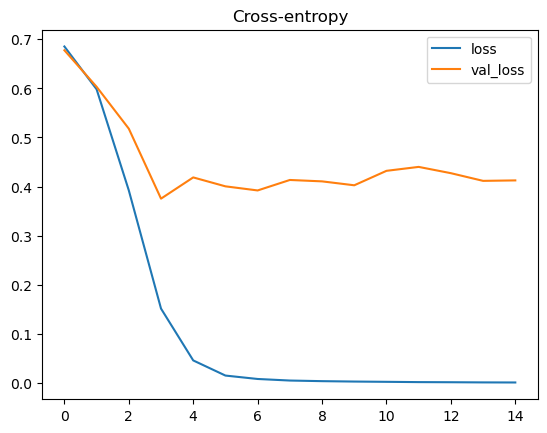

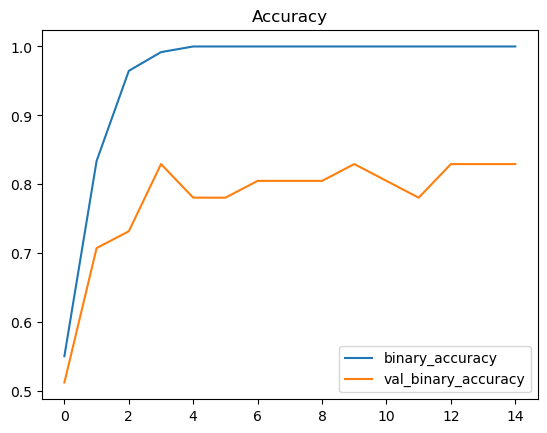

In [37]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [38]:
history_df

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.685285,0.550409,0.677560,0.512195
1,0.598122,0.833787,0.603213,0.707317
2,0.392262,0.964578,0.517907,0.731707
3,0.151584,0.991826,0.375458,0.829268
4,0.046046,1.000000,0.418681,0.780488
5,0.015219,1.000000,0.400504,0.780488
6,0.008270,1.000000,0.392148,0.804878
7,0.005089,1.000000,0.413472,0.804878
8,0.003842,1.000000,0.410632,0.804878
9,0.003025,1.000000,0.402654,0.829268


In [39]:
y_pred = model.predict(X_test.to_numpy())
y_pred = y_pred.round()
print(model)
print()
print_metrics(y_train, y_test, y_pred)

4/4 [==============================] - 0s 9ms/step

Train size 	408 = 218 False + 190 True
Test size 	102 = 53 False + 49 True

Accuracy score 	81.37%
Recall score 	87.76%
F1 score 	81.90%
False Positive 	12.75%
False Negative 	5.88%



2022-11-23 14:49:59.468384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


# Sauvegarde des résultats
---

# Conclusions
---

- 

# Bricolages
---

In [50]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [51]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [70]:
tf.device("/CPU:0")

In [75]:
tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/GPU:0'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Run on the GPU
c = tf.matmul(a, b)
print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [76]:
tf.debugging.set_log_device_placement(True)

In [77]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]